<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Standard imports
import sys
import os
# Non-standard imports
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

PROJECT_PATH = os.path.dirname(os.getcwd())
print(f'PROJECT_PATH = {PROJECT_PATH}')

if not PROJECT_PATH in sys.path:
    sys.path.append(PROJECT_PATH)

# Use the package
import py_fatigue as pf
from py_fatigue.version import parse_version, __version__
v = parse_version(__version__)

PROJECT_PATH = C:\Users\pietr\Documents\Azure\py_fatigue


In [2]:
plt.rcParams['figure.figsize'] = (10.5/2.514/0.7, 4.5/2.514/0.7)
plt.rcParams["font.family"] = "Times New Roman"  # "Roboto"
plt.rcParams["font.size"] = 12
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.color'] = "#CCCCCC"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['grid.color'] = "#DDDDDD"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = True

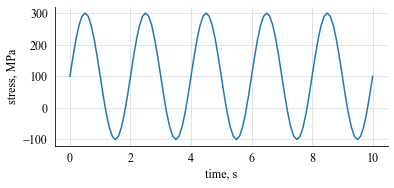

In [3]:
t = np.arange(0, 10.1, 0.1)  # (in seconds)
s = 200 * np.sin(np.pi*t) + 100   # (in MPa)
plt.plot(t, s)
plt.xlabel("time, s")
plt.ylabel("stress, MPa")
plt.show()

In [4]:
import datetime
cc = pf.CycleCount.from_timeseries(s, time=t, name="Example 2")
cc

,Example 2
Cycle counting object,
"largest full stress range, MPa",None
"largest stress range, MPa",400.0
number of full cycles,0
number of residuals,11
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [5]:
w3a = pf.SNCurve([3, 5], [10.970, 13.617],
                 norm='DNVGL-RP-C203', curve='W3', environment='Air')

In [6]:
df = cc.to_df()
df.miner.damage(w3a)
print(df)
print(f"Damage from pandas df: {df['pm_damage'].sum()}")
print(f"Damage from  function: {sum(pf.stress_life.get_pm(cc, w3a))}")

    count_cycle   mean_stress  stress_range  cycles_to_failure  pm_damage
0           0.5  2.000000e+02         200.0       11665.678760   0.000043
1           0.5  1.000000e+02         400.0        1458.209845   0.000343
2           0.5  1.000000e+02         400.0        1458.209845   0.000343
3           0.5  1.000000e+02         400.0        1458.209845   0.000343
4           0.5  1.000000e+02         400.0        1458.209845   0.000343
5           0.5  1.000000e+02         400.0        1458.209845   0.000343
6           0.5  1.000000e+02         400.0        1458.209845   0.000343
7           0.5  1.000000e+02         400.0        1458.209845   0.000343
8           0.5  1.000000e+02         400.0        1458.209845   0.000343
9           0.5  1.000000e+02         400.0        1458.209845   0.000343
10          0.5 -1.207923e-13         200.0       11665.678760   0.000043
Damage from pandas df: 0.0031716971435032985
Damage from  function: 0.0031716971435032985


In [7]:
df

,count_cycle,mean_stress,stress_range,cycles_to_failure,pm_damage
0,0.5,2.000000e+02,200.0,11665.678760,0.000043
1,0.5,1.000000e+02,400.0,1458.209845,0.000343
2,0.5,1.000000e+02,400.0,1458.209845,0.000343
3,0.5,1.000000e+02,400.0,1458.209845,0.000343
4,0.5,1.000000e+02,400.0,1458.209845,0.000343
5,0.5,1.000000e+02,400.0,1458.209845,0.000343
6,0.5,1.000000e+02,400.0,1458.209845,0.000343
7,0.5,1.000000e+02,400.0,1458.209845,0.000343
8,0.5,1.000000e+02,400.0,1458.209845,0.000343
9,0.5,1.000000e+02,400.0,1458.209845,0.000343


If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


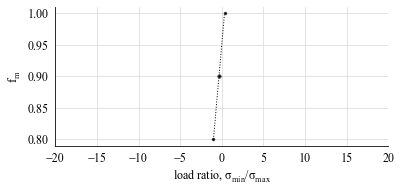

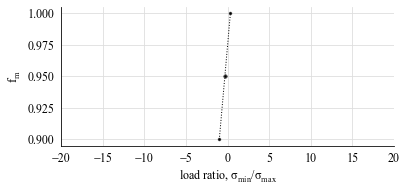

In [8]:
cc_corr_6 = cc.mean_stress_correction(
    correction_type = "DNVGL-RP-C203",
    plot = True,
    detail_factor=0.6,
  )
cc_corr_8 = cc.mean_stress_correction(
    correction_type = "DNVGL-RP-C203",
    plot = True,
    detail_factor=0.8,
)

In [9]:
cc_corr_6

,Example 2
Cycle counting object,
"largest full stress range, MPa",None
"largest stress range, MPa",360.0
number of full cycles,0
number of residuals,11
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,DNVGL-RP-C203: {'detail_factor': 0.6}


If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


,Example 2
Cycle counting object,
"largest full stress range, MPa",None
"largest stress range, MPa",235.215805
number of full cycles,0
number of residuals,11
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,WALKER: {'gamma': 0.6}


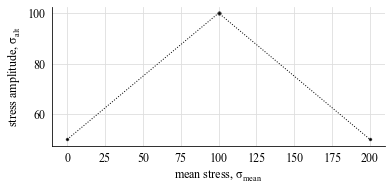

In [10]:
cc_corr_w = cc.mean_stress_correction(
    correction_type = "walker",
    plot = True,
    gamma=0.6,
  )
cc_corr_w

In [21]:
cc.mean_stress + cc.stress_amplitude

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 100.])

In [23]:
cc.stress_range

array([200., 400., 400., 400., 400., 400., 400., 400., 400., 400., 200.])

In [22]:
2 * (cc.mean_stress + cc.stress_amplitude) ** (1 - 0.6) * cc.stress_amplitude ** (0.6)

array([310.36911478, 470.43160901, 470.43160901, 470.43160901,
       470.43160901, 470.43160901, 470.43160901, 470.43160901,
       470.43160901, 470.43160901, 200.        ])

In [11]:
cc_corr_w.stress_range

array([155.18455739, 235.2158045 , 235.2158045 , 235.2158045 ,
       235.2158045 , 235.2158045 , 235.2158045 , 235.2158045 ,
       235.2158045 , 235.2158045 , 100.        ])

In [14]:
cc.stress_range

array([200., 400., 400., 400., 400., 400., 400., 400., 400., 400., 200.])

In [15]:
np.divide(cc_corr_6.stress_range, cc.stress_range)

array([1. , 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8])

Text(0, 0.5, 'stress, MPa')

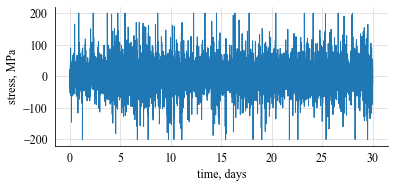

In [168]:
import random
from collections import defaultdict
# input data
random.seed(0)
α = 1
β = 0.6
signal_duration = int(86400 / 60)  # (in minutes)
max_peak = 200  # (in MPa)

# list of timestamps
timestamps = []

# list of timeseries
timeseries = []

# concatenated time and stress arrays
conc_time = np.empty(0)
conc_stress = np.empty(0)

# main loop
for i in range(0, 30):
    print(f"{i} / 30", end = "\r")
    timestamps.append(
        datetime.datetime(2020, 1, i + 1, tzinfo=datetime.timezone.utc)
    )
    timeseries.append(defaultdict())
    weib_amp = [
        random.weibullvariate(α, β) for _ in range(signal_duration)
    ]
    weib_amp = (max_peak / max(weib_amp) * np.array(weib_amp)).tolist()
    t = np.arange(0, 1.1, 0.1)  # (in seconds)
    time = t
    stress = np.empty(0)  # (in MPa)
    for j, a in enumerate(weib_amp):
        stress = np.hstack([stress[:-1], (-1) ** j * a * np.sin(np.pi*t)])
        if j > 0: time = np.hstack([time[:-1], t + time[-1]])
    conc_time = np.hstack(
        [conc_time, time + conc_time[-1] if len(conc_time) > 0 else time]
    )
    conc_stress = np.hstack([conc_stress, stress])
    timeseries[i]["data"] = stress
    timeseries[i]["time"] = time
    timeseries[i]["timestamp"] = timestamps[-1]
    timeseries[i]["name"] = "Example sum"
timeseries.append({
    "data": conc_stress,
    "time": conc_time,
    "timestamp": timestamps[0],
    "name": "Concatenated"
})

# concatenated timeseries plot
plt.plot(conc_time / 60 / 24, conc_stress, lw=1)
plt.xlabel("time, days")
plt.ylabel("stress, MPa")

In [166]:
int(86400 / 60) / 60 / 24

1.0

In [48]:
cc_1 = pf.CycleCount.from_timeseries(stress, time, name="Example 2")

In [50]:
len(timeseries[0]["data"])

100001

In [169]:
cc = []
for t_s in timeseries:
    cc.append(pf.CycleCount.from_timeseries(**t_s))

In [170]:
cc_s = sum(cc[:-1])

In [171]:
cc_c = pf.CycleCount.from_timeseries(**timeseries[-1])

In [172]:
cc_s.solve_lffd()

,Example sum
Cycle counting object,
"largest full stress range, MPa",387.040934
"largest stress range, MPa",400.0
number of full cycles,21584
number of residuals,33
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,No


In [177]:
cc_s.solve_lffd()

,Example sum
Cycle counting object,
"largest full stress range, MPa",387.040934
"largest stress range, MPa",400.0
number of full cycles,21584
number of residuals,33
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,No


In [178]:
cc_c.residuals_sequence

array([ 0.00000000e+00,  1.43467170e+01, -9.12941335e+00,  2.20069094e+01,
       -5.27102322e+01,  8.96948137e+01, -1.44951668e+02,  2.00000000e+02,
       -2.00000000e+02,  2.00000000e+02, -2.00000000e+02,  2.00000000e+02,
       -2.00000000e+02,  2.00000000e+02, -2.00000000e+02,  2.00000000e+02,
       -2.00000000e+02,  2.00000000e+02, -2.00000000e+02,  2.00000000e+02,
       -2.00000000e+02,  2.00000000e+02, -2.00000000e+02,  1.64718875e+02,
       -1.34075627e+02,  1.05437524e+02, -1.16840844e+02,  9.02098821e+01,
       -8.86805089e+01,  4.72786717e+01, -2.62827824e+01,  1.97219547e+00,
       -8.80822022e+00, -1.07869587e-15])

In [175]:
cc_s.solve_lffd(solve_mode="min-max")

,Example sum
Cycle counting object,
"largest full stress range, MPa",387.040934
"largest stress range, MPa",400.0
number of full cycles,21398
number of residuals,17
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,No


In [176]:
cc[0]

,Example sum
Cycle counting object,
"largest full stress range, MPa",281.591558
"largest stress range, MPa",344.951668
number of full cycles,714
number of residuals,13
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


In [157]:
import matplotlib

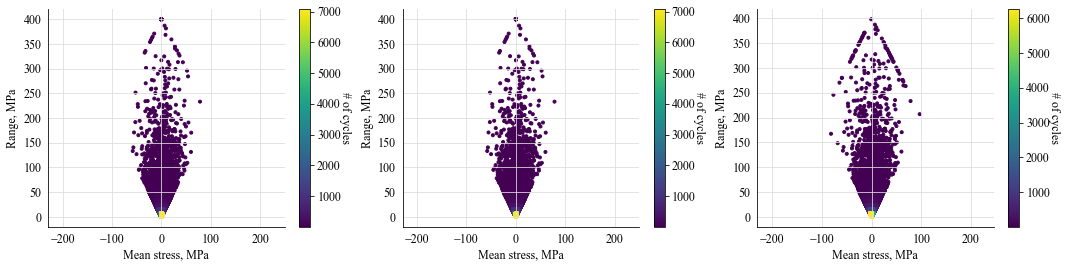

In [180]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
cc_c.plot_histogram(fig=fig, ax=axs[0], plot_type="mean-range")
cc_s.solve_lffd().plot_histogram(fig=fig, ax=axs[1], plot_type="mean-range")
cc_s.plot_histogram(fig=fig, ax=axs[2], plot_type="mean-range")

plt.show()

(<Figure size 429.594x184.112 with 1 Axes>,
 <AxesSubplot:xlabel='Residuals sequence', ylabel='Residuals'>)

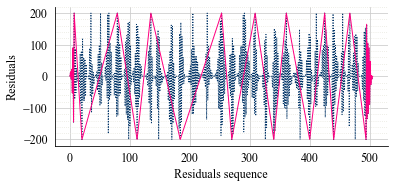

In [160]:
cc_s.plot_half_cycles_sequence(lw=1)